In [1]:
from util import *
from expval_calc_q_optim import *
from generate_training_set import *

from qiskit.utils import QuantumInstance 
from qiskit.test.mock import FakeVigo
from qiskit import Aer

import matplotlib.pyplot as plt

In [2]:
# Create appropriate instances
vigo_backend = FakeVigo()
em_instance = QuantumInstance(backend = vigo_backend, shots = 10000)
sv_backend = Aer.get_backend('aer_simulator_statevector')
ef_instance = QuantumInstance(backend = sv_backend)

In [3]:
# LBEM
seed = 100

group_pauli_op, [ansatz,num_par_gates] = main('H2', 0.774, 2, 1, 'num_particle_preserving')
group_pauli_op = group_pauli_op['grouped_paulis']
print('Ansatz & qubit hamiltonian created')

trunc_T, trunc_P = truncate_training_set(num_par_gates, 0, 0, s = seed, exhaustive= True)
circuit_list = get_circuits_dict(ansatz, trunc_T, trunc_P, num_par_gates)
print('Training circuits generated')

com_ef, com_em = expval_calc(group_pauli_op, circuit_list, em_instance, ef_instance)
print('All expectation values calculated')

q = q_optimize(group_pauli_op, circuit_list, com_em, com_ef)
print('q optimized')

Ansatz & qubit hamiltonian created
Training circuits generated
All expectation values calculated
q optimized


In [4]:
# Test using some random angles
angles = (2*np.pi/20) * np.array(list(range(20)))
efs = []
ems = []
ns = []

for angle in angles:
    ef_expval, em_expval, n_expval = test(ansatz, [angle], group_pauli_op, q, ef_instance, em_instance)
    print('Angle: {} | Error free value: {} | Error mitigated value: {} | Noisy value: {}'.format(angle, ef_expval, em_expval, n_expval))
    
    efs.append(ef_expval)
    ems.append(em_expval)
    ns.append(n_expval)

Angle: 0.0 | Error free value: (0.7601782935585369+0j) | Error mitigated value: (0.7860175697553567+0j) | Noisy value: (0.6894911414528035+0j)
Angle: 0.3141592653589793 | Error free value: (0.5094568328582583+0j) | Error mitigated value: (0.5403414199082182+0j) | Noisy value: (0.48433807607173673+0j)
Angle: 0.6283185307179586 | Error free value: (0.06834387491332178+0j) | Error mitigated value: (0.09288129387958567+0j) | Noisy value: (0.08572355353018771+0j)
Angle: 0.9424777960769379 | Error free value: (-0.3946704232193109+0j) | Error mitigated value: (-0.3808587539984566+0j) | Noisy value: (-0.3050610941266309+0j)
Angle: 1.2566370614359172 | Error free value: (-0.7027303369301509+0j) | Error mitigated value: (-0.7080270702388527+0j) | Noisy value: (-0.5913276204753498+0j)
Angle: 1.5707963267948966 | Error free value: (-0.7381674497530166+0j) | Error mitigated value: (-0.7619456648749553+0j) | Noisy value: (-0.6357456525823458+0j)
Angle: 1.8849555921538759 | Error free value: (-0.4874

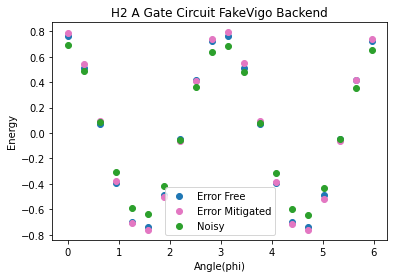

In [10]:
plt.scatter(angles, efs, c = 'tab:blue', label = 'Error Free')
plt.scatter(angles, ems, c = 'tab:pink', label = 'Error Mitigated')
plt.scatter(angles, ns, c = 'tab:green', label = 'Noisy')
plt.xlabel('Angle(phi)')
plt.ylabel('Energy')
plt.title('H2 A Gate Circuit FakeVigo Backend')
plt.legend()

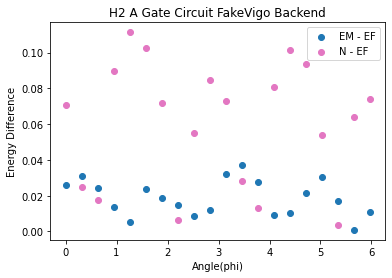

In [11]:
plt.scatter(angles, np.abs(np.array(ems) - np.array(efs)), c = 'tab:blue', label = 'EM - EF')
plt.scatter(angles, np.abs(np.array(ns) - np.array(efs)), c = 'tab:pink', label = 'N - EF')
plt.xlabel('Angle(phi)')
plt.ylabel('Energy Difference')
plt.title('H2 A Gate Circuit FakeVigo Backend')
plt.legend()

In [7]:
q

(array([ 0.14194186,  0.06747891,  0.13828064, -0.06541691, -0.22458071,
         0.08115016,  0.16268455,  0.12371261, -0.11375525,  0.24046799,
         0.17608165,  0.29945689,  0.33289895, -0.09781343, -0.15121869,
         0.13645273, -0.01360663]),
 ['II',
  'IX',
  'IY',
  'IZ',
  'XI',
  'XX',
  'XY',
  'XZ',
  'YI',
  'YX',
  'YY',
  'YZ',
  'ZI',
  'ZX',
  'ZY',
  'ZZ',
  'q0'])

In [12]:
ansatz.draw()

┌───┐┌───┐                                                          »
q_0: ┤ X ├┤ X ├─────────────────────────────────■────────────────────────»
     └───┘└─┬─┘┌────────────────────┐┌───────┐┌─┴─┐┌────────────────────┐»
q_1: ───────■──┤ Ry(theta[0] + π/2) ├┤ Rz(π) ├┤ X ├┤ Ry(theta[0] + π/2) ├»
               └────────────────────┘└───────┘└───┘└────────────────────┘»
«              ┌───┐
«q_0: ─────────┤ X ├
«     ┌───────┐└─┬─┘
«q_1: ┤ Rz(π) ├──■──
«     └───────┘